In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.listdir('/content/drive/MyDrive/Finpro Rakamin Group 1')

['(New) Final Report Examples DS.pptx',
 'Stage 1',
 'Stage 2',
 'Stage 3',
 'Stage 4',
 'Stage 0',
 'Logo.jfif',
 'business understanding.docx',
 'employee_churn_prediction_updated.csv',
 'business understanding update.docx',
 'Finpro.ipynb']

In [5]:
rcParams['figure.figsize'] = 10, 7
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Finpro Rakamin Group 1/employee_churn_prediction_updated.csv')

data.sample(5)

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period
521,522,31,Female,Diploma,1,76,0.61,55,12,4496030,0.08,2,Suburban,4,3.70,1,Married,30,3 Months
737,738,30,Male,Diploma,1,69,0.98,51,4,3689317,0.03,3,Suburban,3,3.10,0,Single,38,Stayed
740,741,40,Male,Bachelor,9,107,1.08,65,10,7315596,0.06,3,Urban,1,0.30,1,Single,5,1 Month
660,661,43,Male,Bachelor,2,174,0.90,49,4,7895035,0.05,2,Suburban,4,2.20,0,Single,33,Stayed
411,412,29,Male,Diploma,9,161,1.10,68,1,7838094,0.03,3,Suburban,2,4.40,1,Married,39,1 Month


### EDA
univariate  
bivariate  
multivariate  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [10]:
#DESCRIBE DATA NUMERIC
data.describe()

,employee_id,age,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,manager_support_score,company_tenure_years,churn,distance_to_office_km
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,32.84,4.50,125.88,0.79,54.10,9.51,5487913.87,0.06,2.52,2.53,2.60,0.63,24.12
std,288.82,6.85,2.89,43.90,0.23,8.72,5.74,1436482.19,0.02,1.13,1.12,1.40,0.48,13.98
min,1.00,22.00,0.00,50.00,0.40,40.00,0.00,3000037.00,0.02,1.00,1.00,0.10,0.00,1.00
25%,250.75,27.00,2.00,86.75,0.59,46.00,5.00,4258969.50,0.04,2.00,2.00,1.40,0.00,12.00
50%,500.50,33.00,5.00,127.50,0.79,54.00,9.50,5471270.00,0.06,3.00,3.00,2.60,1.00,23.50
75%,750.25,39.00,7.00,164.00,0.99,62.00,15.00,6727894.00,0.08,4.00,4.00,3.80,1.00,36.00
max,1000.00,44.00,9.00,199.00,1.20,69.00,19.00,7999712.00,0.10,4.00,4.00,5.00,1.00,49.00


In [11]:
# data numerical
num_dtypes =['int64','float64']

num_data = data.select_dtypes(include=num_dtypes)
nums = num_data.columns

print(nums)

Index(['employee_id', 'age', 'experience_years', 'monthly_target',
       'target_achievement', 'working_hours_per_week',
       'overtime_hours_per_week', 'salary', 'commission_rate',
       'job_satisfaction', 'manager_support_score', 'company_tenure_years',
       'churn', 'distance_to_office_km'],
      dtype='object')


In [12]:
# data category
set_nums = set(nums)
set_all_columns = set(data.columns)

set_cats = set_all_columns - set_nums

cats = list(set_cats)

cats


['churn_period', 'work_location', 'gender', 'education', 'marital_status']

In [13]:
# DESCRIBE DATA CATEGORY
data[cats].describe()

,churn_period,work_location,gender,education,marital_status
count,1000,1000,1000,1000,1000
unique,4,3,2,3,2
top,Stayed,Urban,Male,Diploma,Single
freq,371,500,703,404,606


In [14]:
data['churn'].value_counts()

,count
churn,
1,629
0,371


In [15]:
# OUTLIER
for col in nums:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f'{col}: {len(outliers)} outlier')

employee_id: 0 outlier
age: 0 outlier
experience_years: 0 outlier
monthly_target: 0 outlier
target_achievement: 0 outlier
working_hours_per_week: 0 outlier
overtime_hours_per_week: 0 outlier
salary: 0 outlier
commission_rate: 0 outlier
job_satisfaction: 0 outlier
manager_support_score: 0 outlier
company_tenure_years: 0 outlier
churn: 0 outlier
distance_to_office_km: 0 outlier


In [16]:
data.duplicated().any()

np.False_

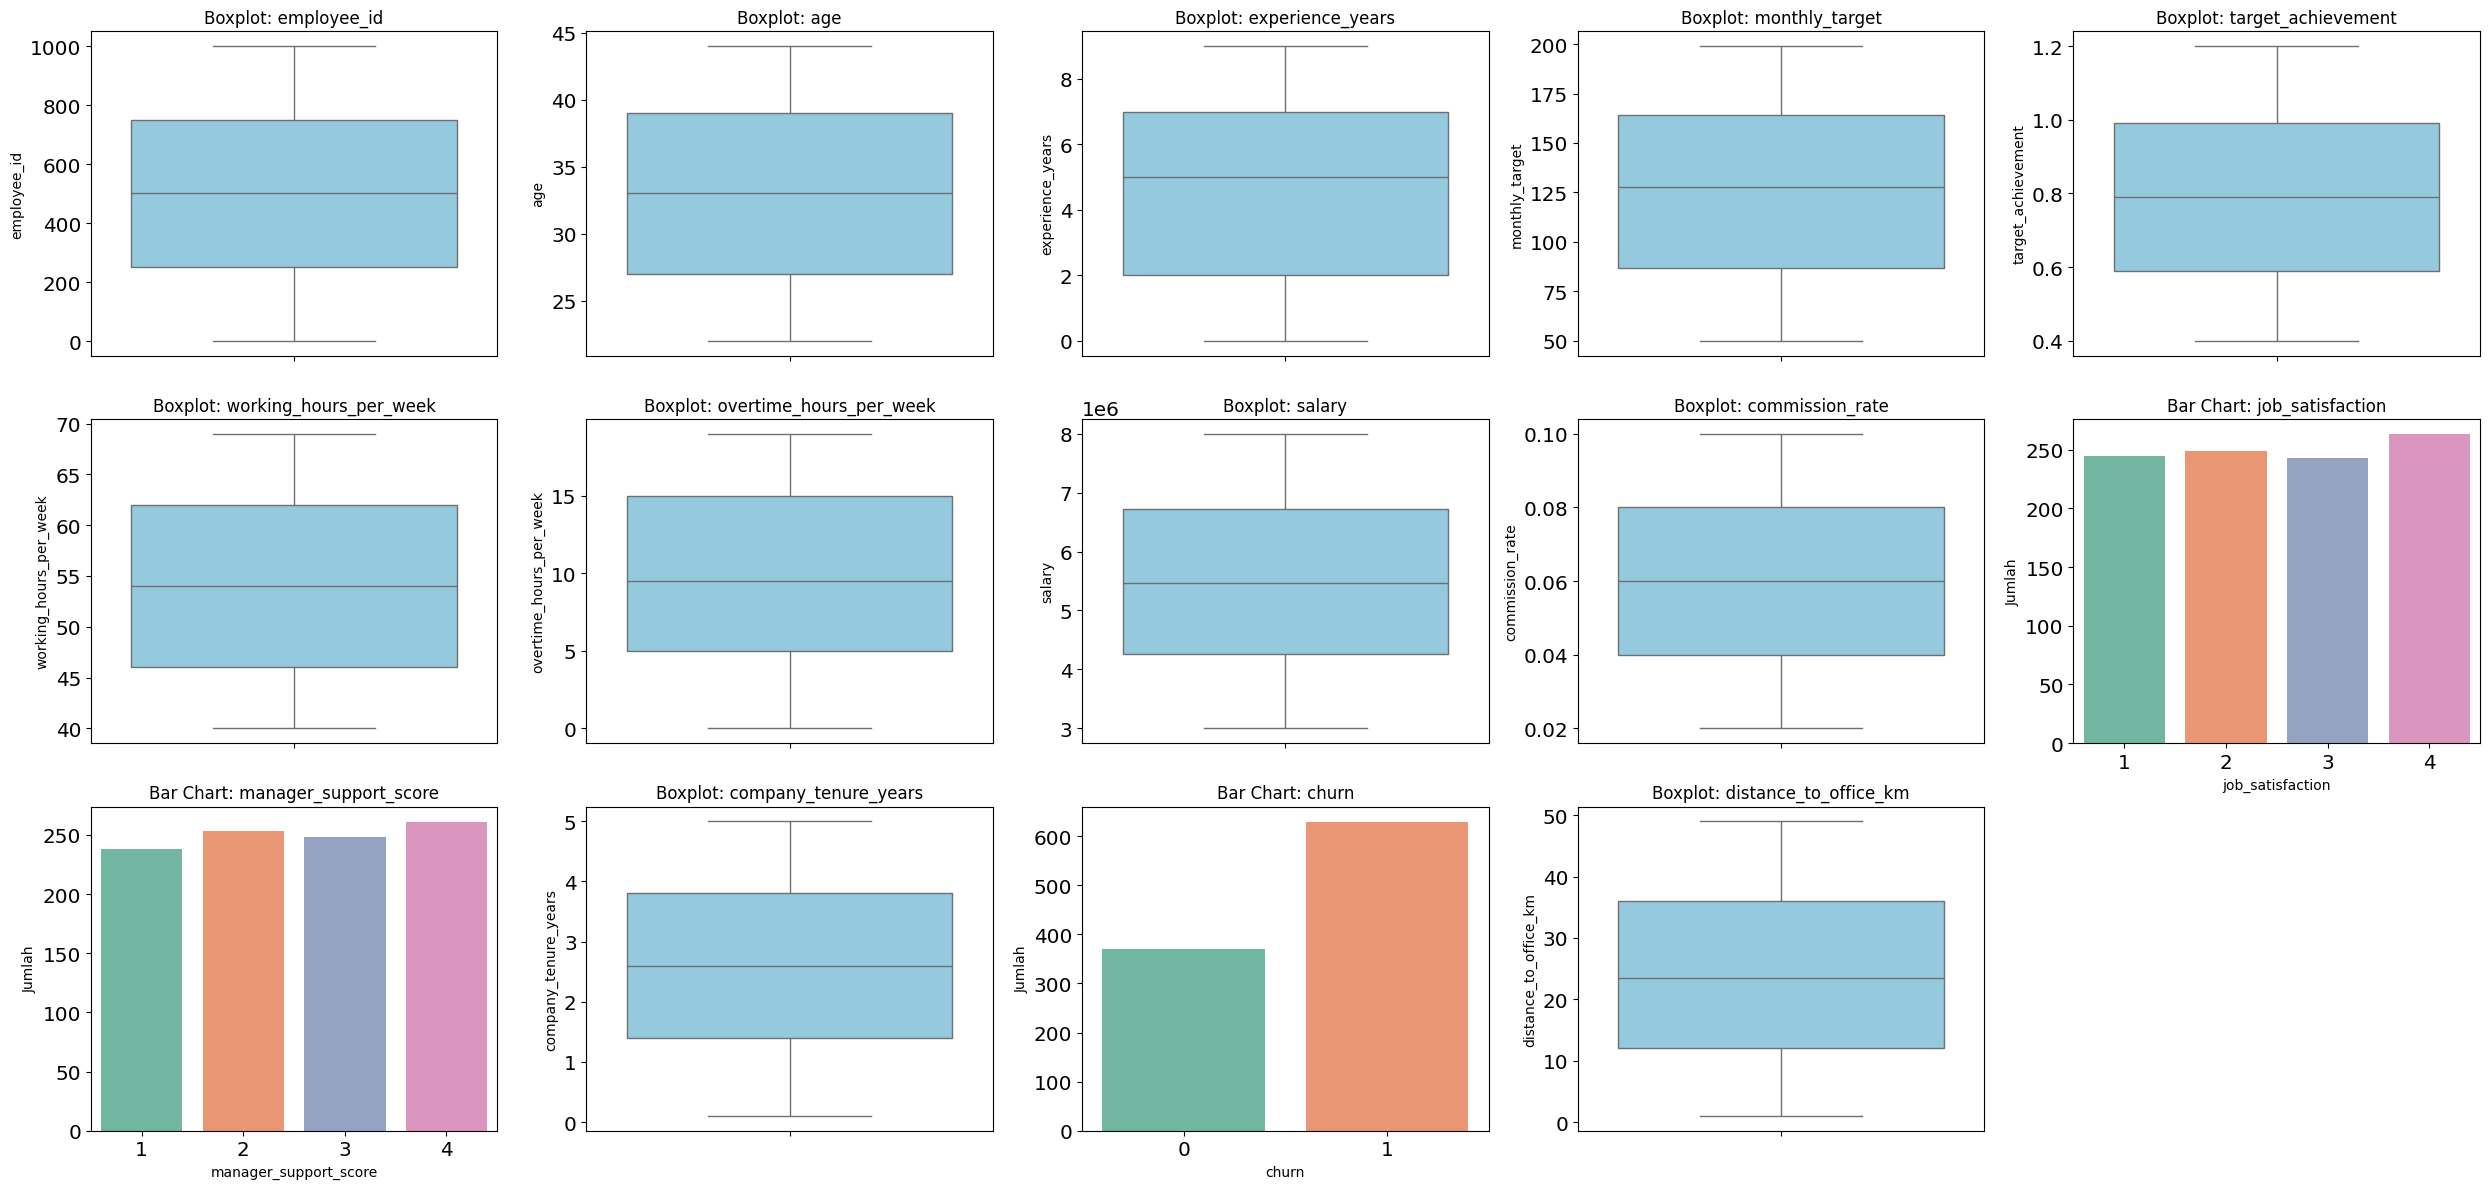

In [17]:
def plot_eda_grid(data, threshold_kategori=5, n_rows=3, n_cols=5):

    total_plots = n_rows * n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    axes = axes.flatten()

    for i, col in enumerate(nums):
        if i >= total_plots:
            break  # cukup 15 grafik (3x5)

        ax = axes[i]
        unique_vals = data[col].nunique()

        if unique_vals <= threshold_kategori:
            sns.countplot(x=col, hue=col, data=data, palette='Set2', ax=ax, legend=False)
            ax.set_title(f'Bar Chart: {col}')
            ax.set_ylabel('Jumlah')
        else:
            sns.boxplot(y=data[col], color='skyblue', ax=ax)
            ax.set_title(f'Boxplot: {col}')
            ax.set_ylabel(col)

        ax.grid(False)

    # Matikan subplot kosong jika kolom < total slot
    for j in range(len(nums), total_plots):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_eda_grid(data)

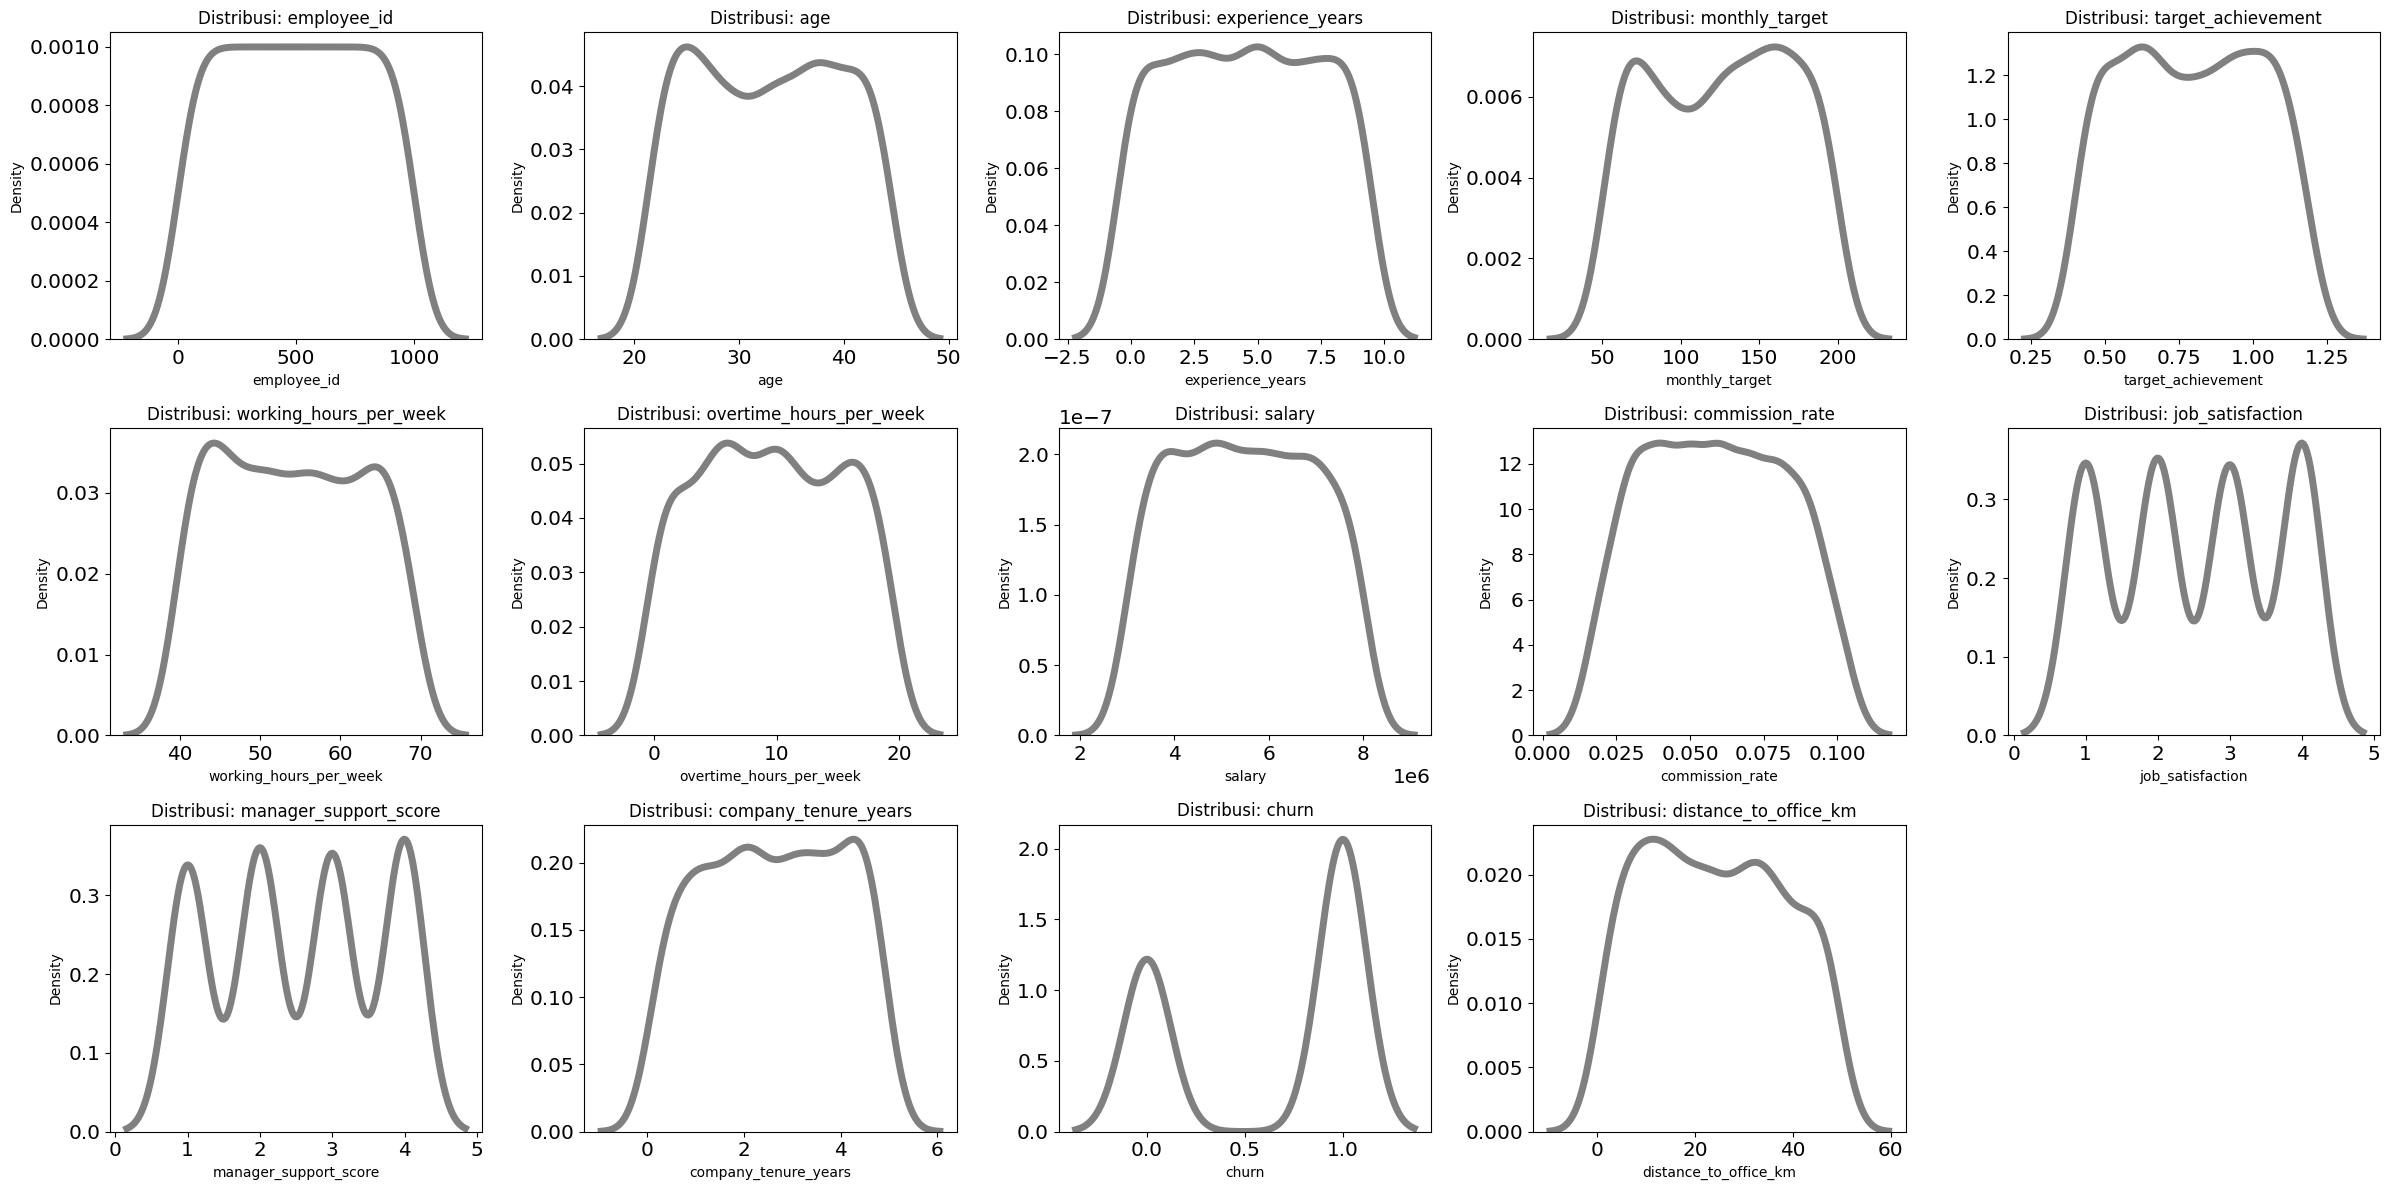

In [18]:
plt.figure(figsize=(24, 12))  # Lebar dan tinggi ditingkatkan

for i in range(0, len(nums)):
    plt.subplot(3, 5, i + 1)  # posisi subplot
    sns.kdeplot(x=data[nums[i]], color='gray', linewidth=5)
    plt.xlabel(nums[i], fontsize=10)
    plt.title(f'Distribusi: {nums[i]}', fontsize=12)
    plt.grid(False)

plt.tight_layout()
plt.show()

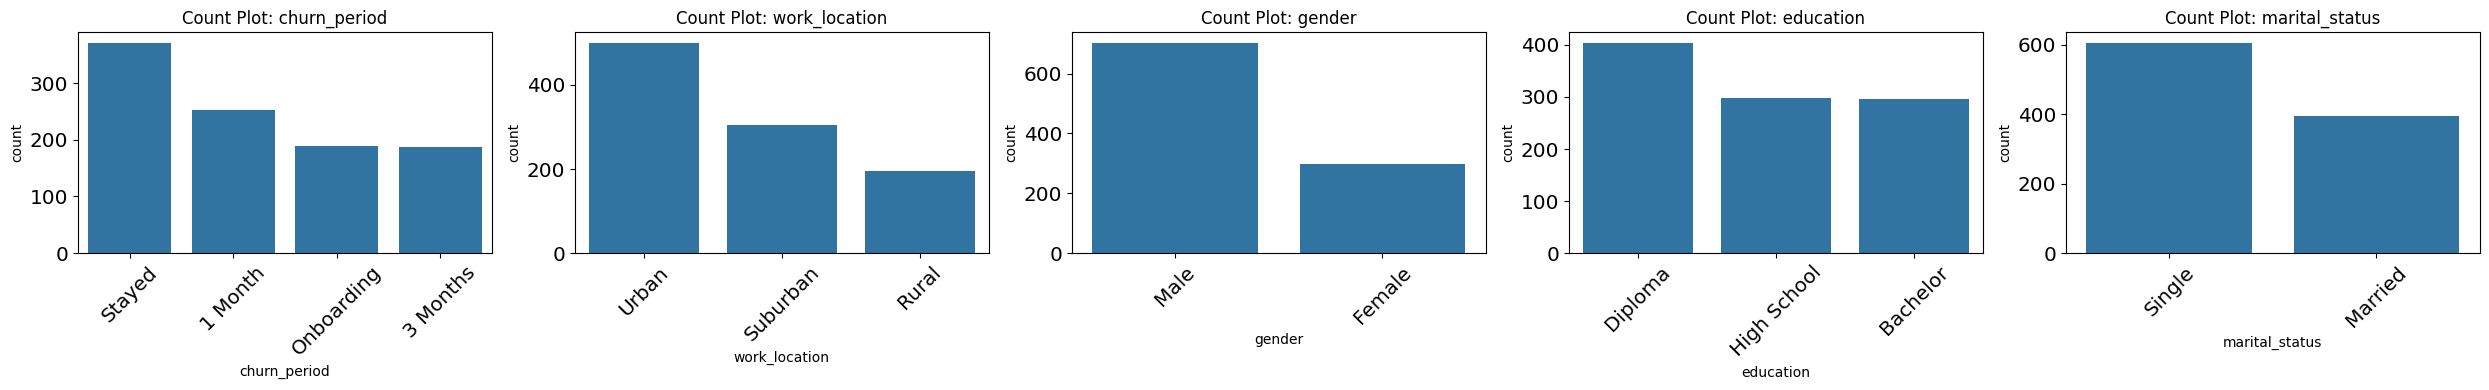

In [19]:
# Jumlah kolom per baris
n_cols = 5
n_plots = len(cats)
n_rows = (n_plots + n_cols - 1) // n_cols  # hitung jumlah baris

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # supaya bisa diakses seperti list

# Loop tiap kolom kategori dan plot
for i, col in enumerate(cats):
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan axes yang tidak terpakai
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

bivariate

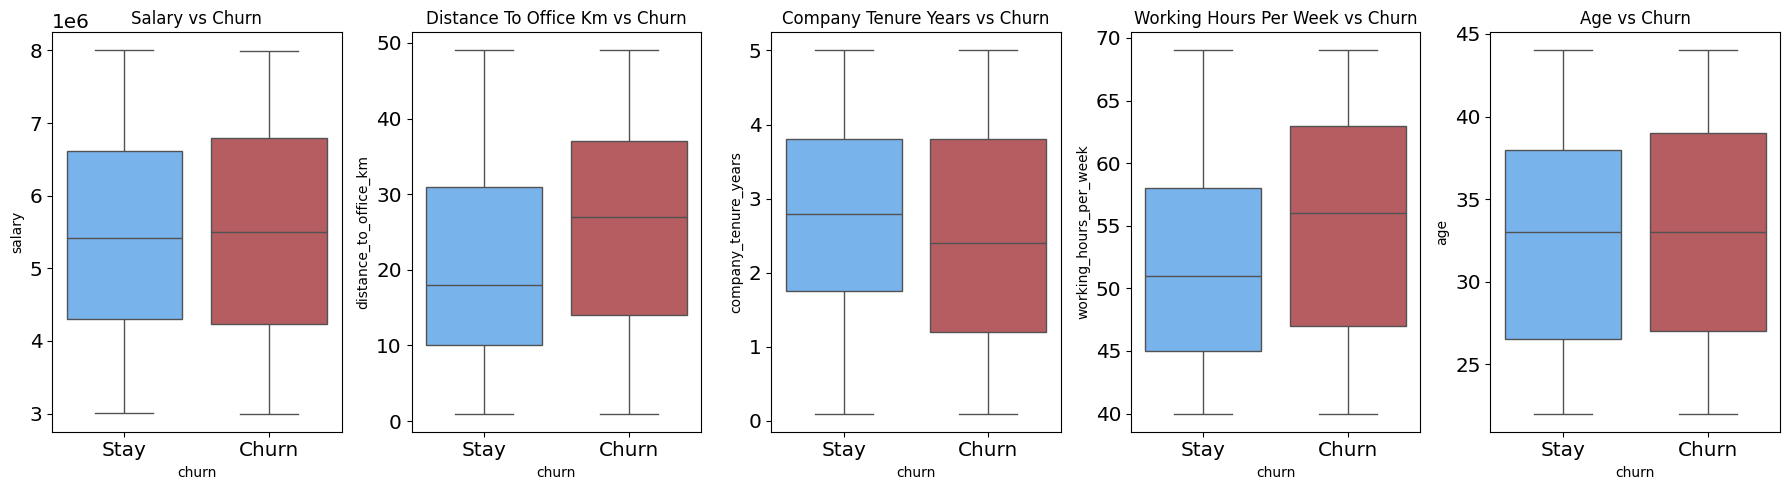

In [20]:
bivar_cols = ['salary', 'distance_to_office_km', 'company_tenure_years','working_hours_per_week', 'age']

plt.figure(figsize=(18, 5))

for i, col in enumerate(bivar_cols):
    ax = plt.subplot(1, len(bivar_cols), i + 1)
    sns.boxplot(x='churn', y=col, data=data, palette=['#66b3ff', '#C44E52'], ax=ax)
    ax.set_xticklabels(['Stay', 'Churn'])
    ax.set_title(f'{col.replace("_", " ").title()} vs Churn')
    ax.grid(False)

plt.tight_layout()
plt.show()

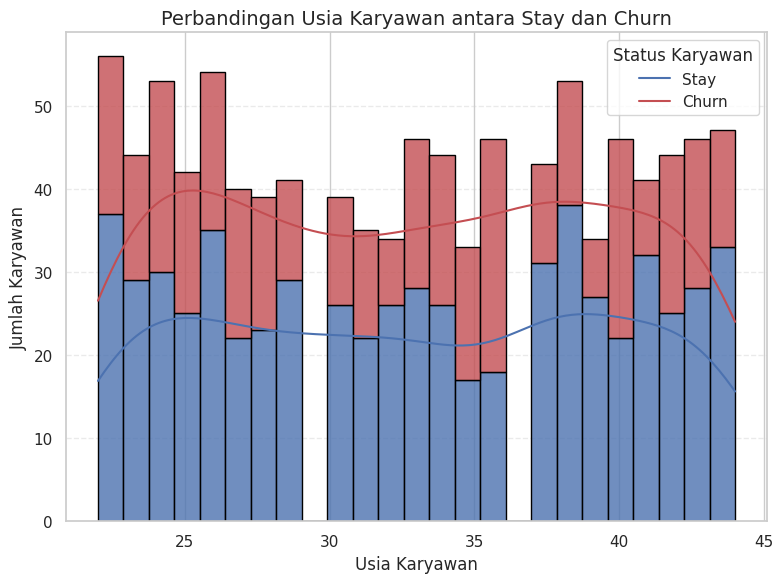

In [21]:
data1 = data.copy()

data1['churn_label'] = data1['churn'].map({0: 'Stay', 1: 'Churn'})
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Histogram Stacked
sns.histplot(
    data=data1,
    x='age',
    hue='churn_label',
    bins=25,
    kde=True,
    multiple='stack',
    palette={'Stay': '#C44E52', 'Churn': '#4C72B0'},
    edgecolor='black',
    alpha=0.8
)


# Custom Legend
plt.legend(title='Status Karyawan')
plt.legend(title='Status Karyawan', labels=['Stay', 'Churn'])
plt.title('Perbandingan Usia Karyawan antara Stay dan Churn', fontsize=14)
plt.xlabel('Usia Karyawan')
plt.ylabel('Jumlah Karyawan')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

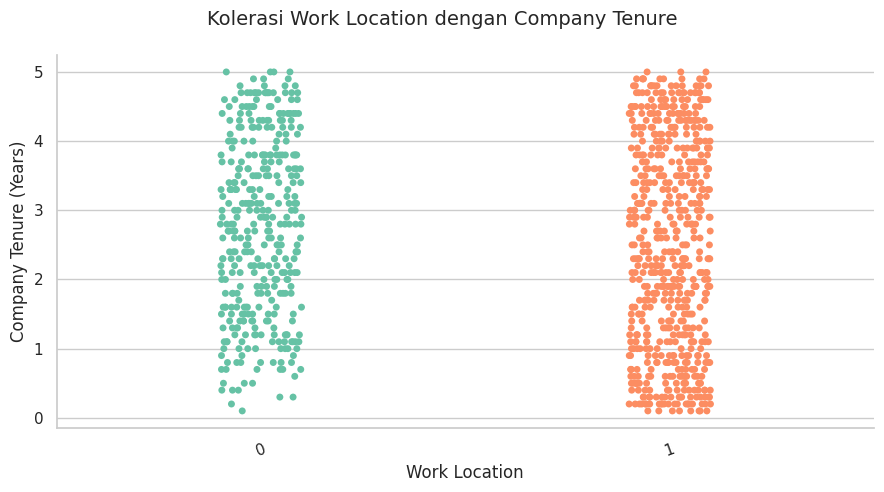

In [23]:
sns.set_theme(style="whitegrid")

# Gunakan kind='strip' untuk dot plot
g = sns.catplot(
    data=data,
    x='churn',
    y='company_tenure_years',
    kind='strip',
    height=5,
    aspect=1.8,
    palette='Set2',
    jitter=True
)

g.set_axis_labels("Work Location", "Company Tenure (Years)")
g.set_xticklabels(rotation=20)
g.fig.suptitle("Kolerasi Work Location dengan Company Tenure", fontsize=14)

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

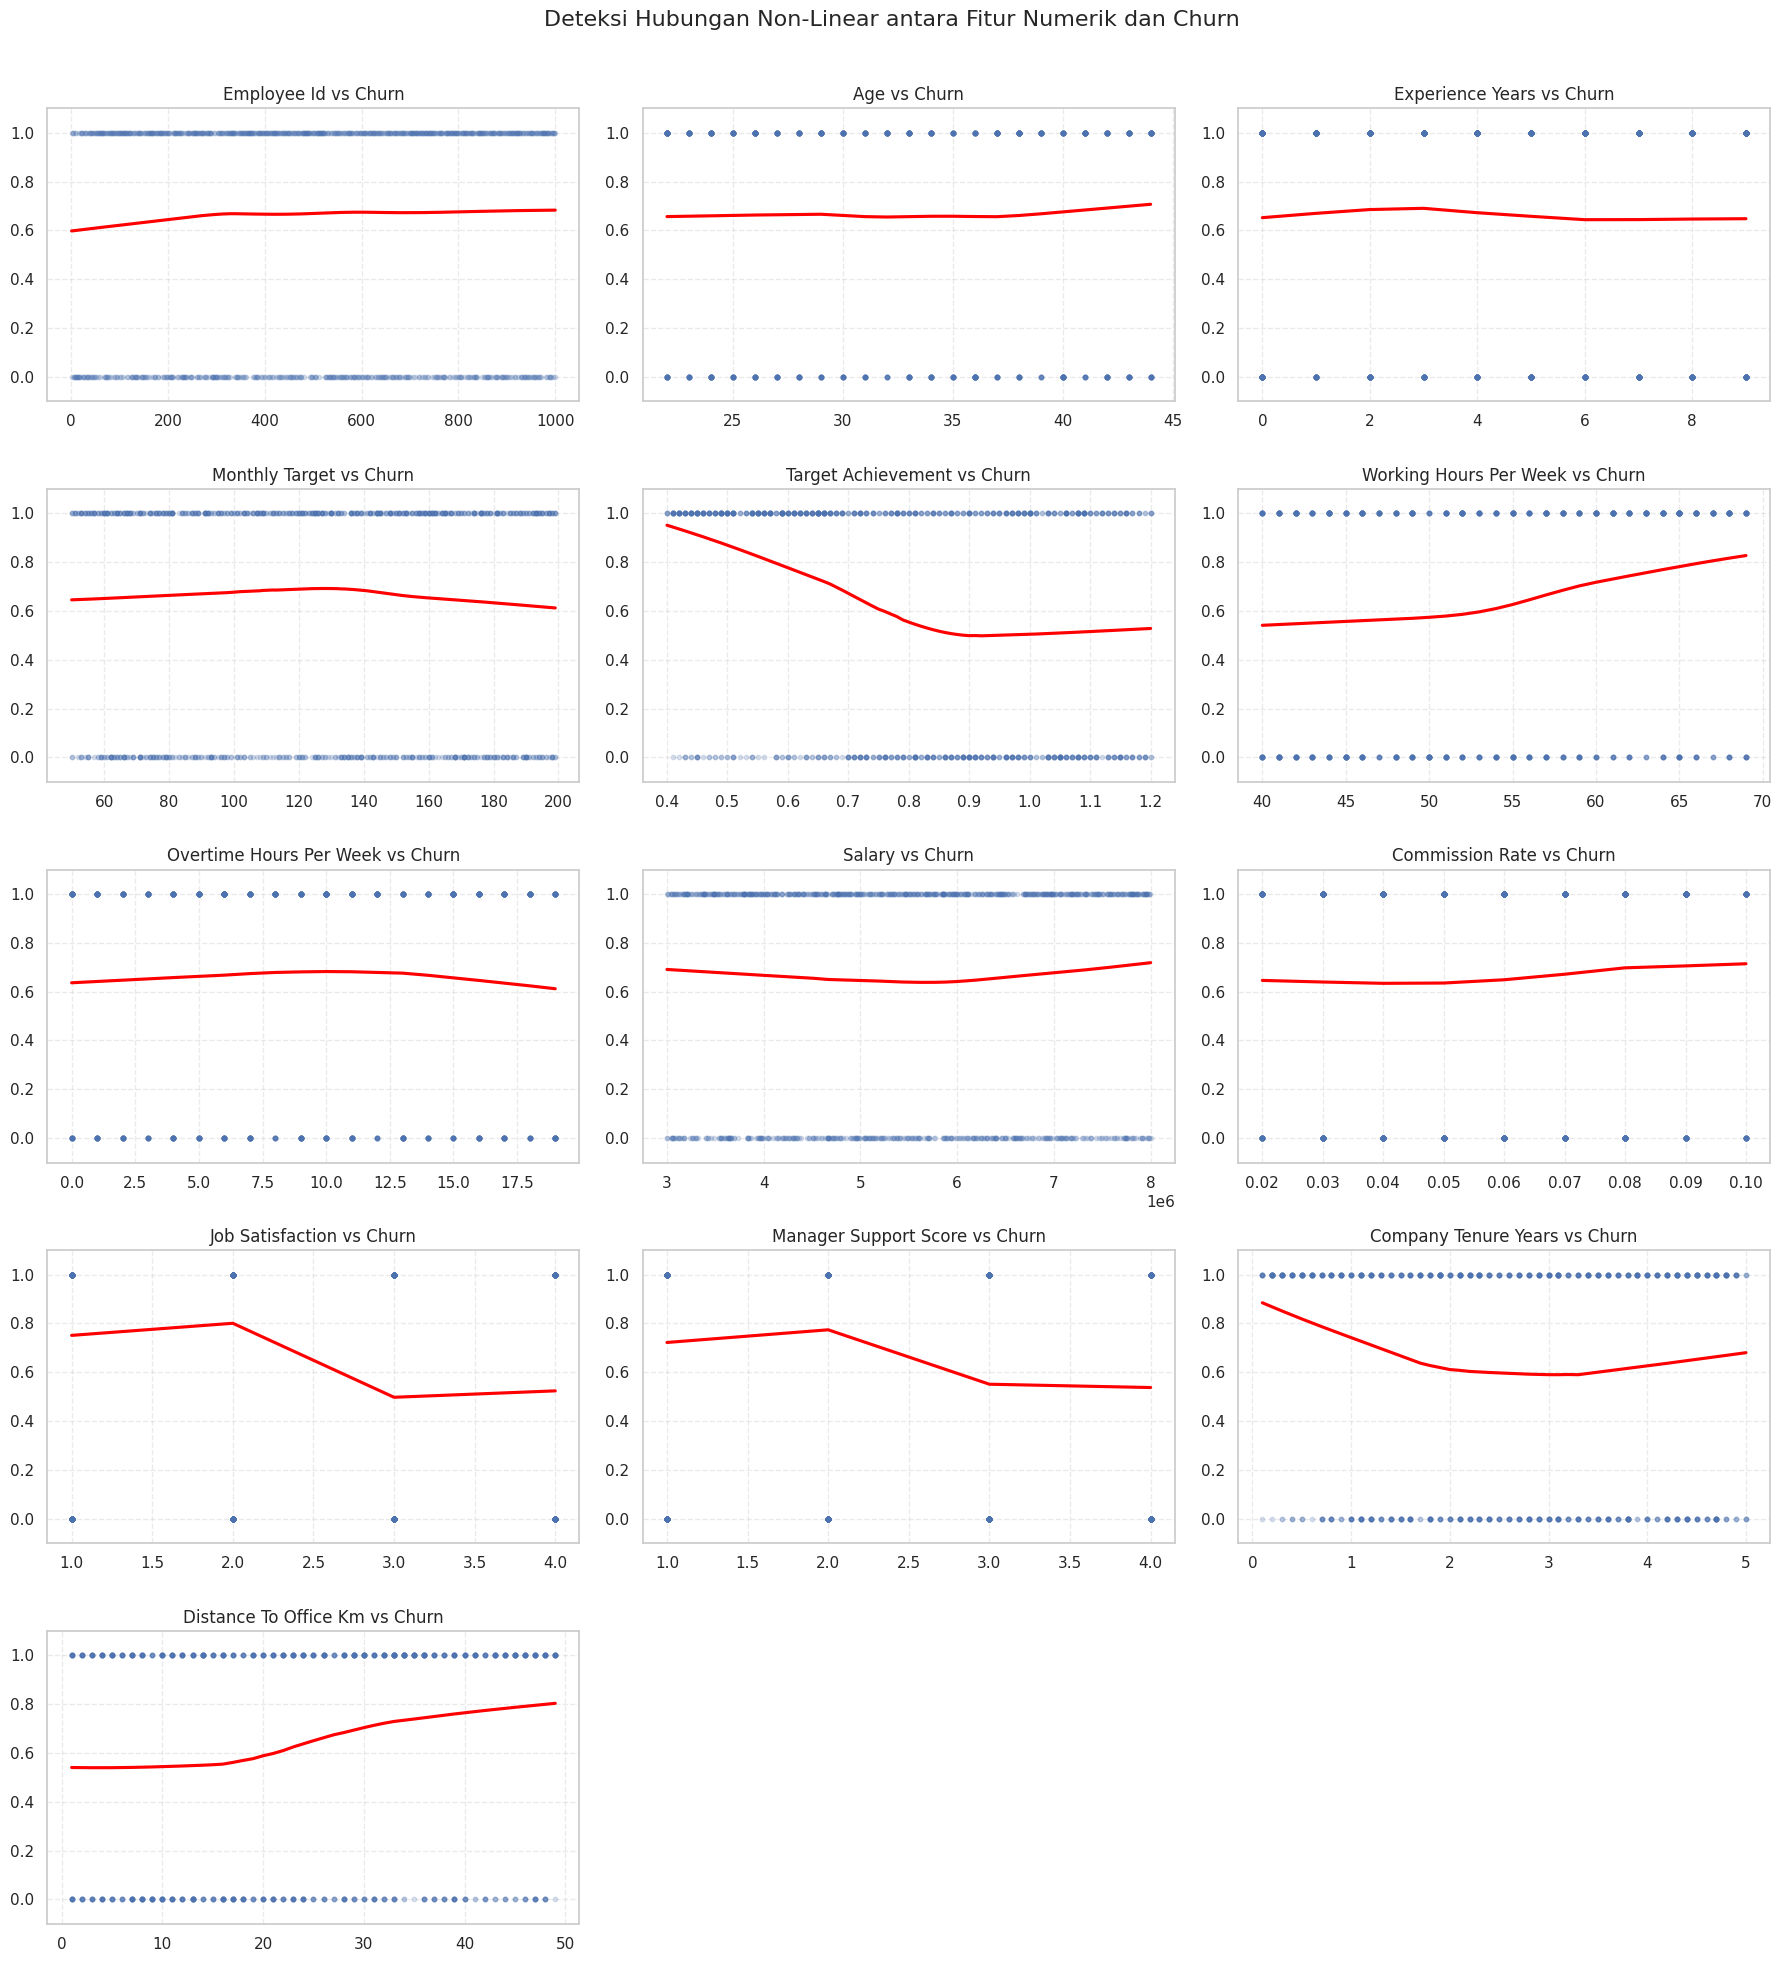

In [24]:

# Ambil semua fitur numerik tanpa churn
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'churn' in num_cols:
    num_cols.remove('churn')

# Tentukan jumlah kolom dan baris subplot
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)
# Ukuran figure
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop untuk buat subplot
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(
        x=col,
        y='churn',
        data=data,
        lowess=True,
        scatter_kws={'alpha': 0.2, 's': 10},
        line_kws={'color': 'red'}
    )
    plt.title(f'{col.replace("_", " ").title()} vs Churn')
    plt.xlabel('')
    plt.ylabel('')

    plt.ylim(-0.1, 1.1)
    plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Deteksi Hubungan Non-Linear antara Fitur Numerik dan Churn', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


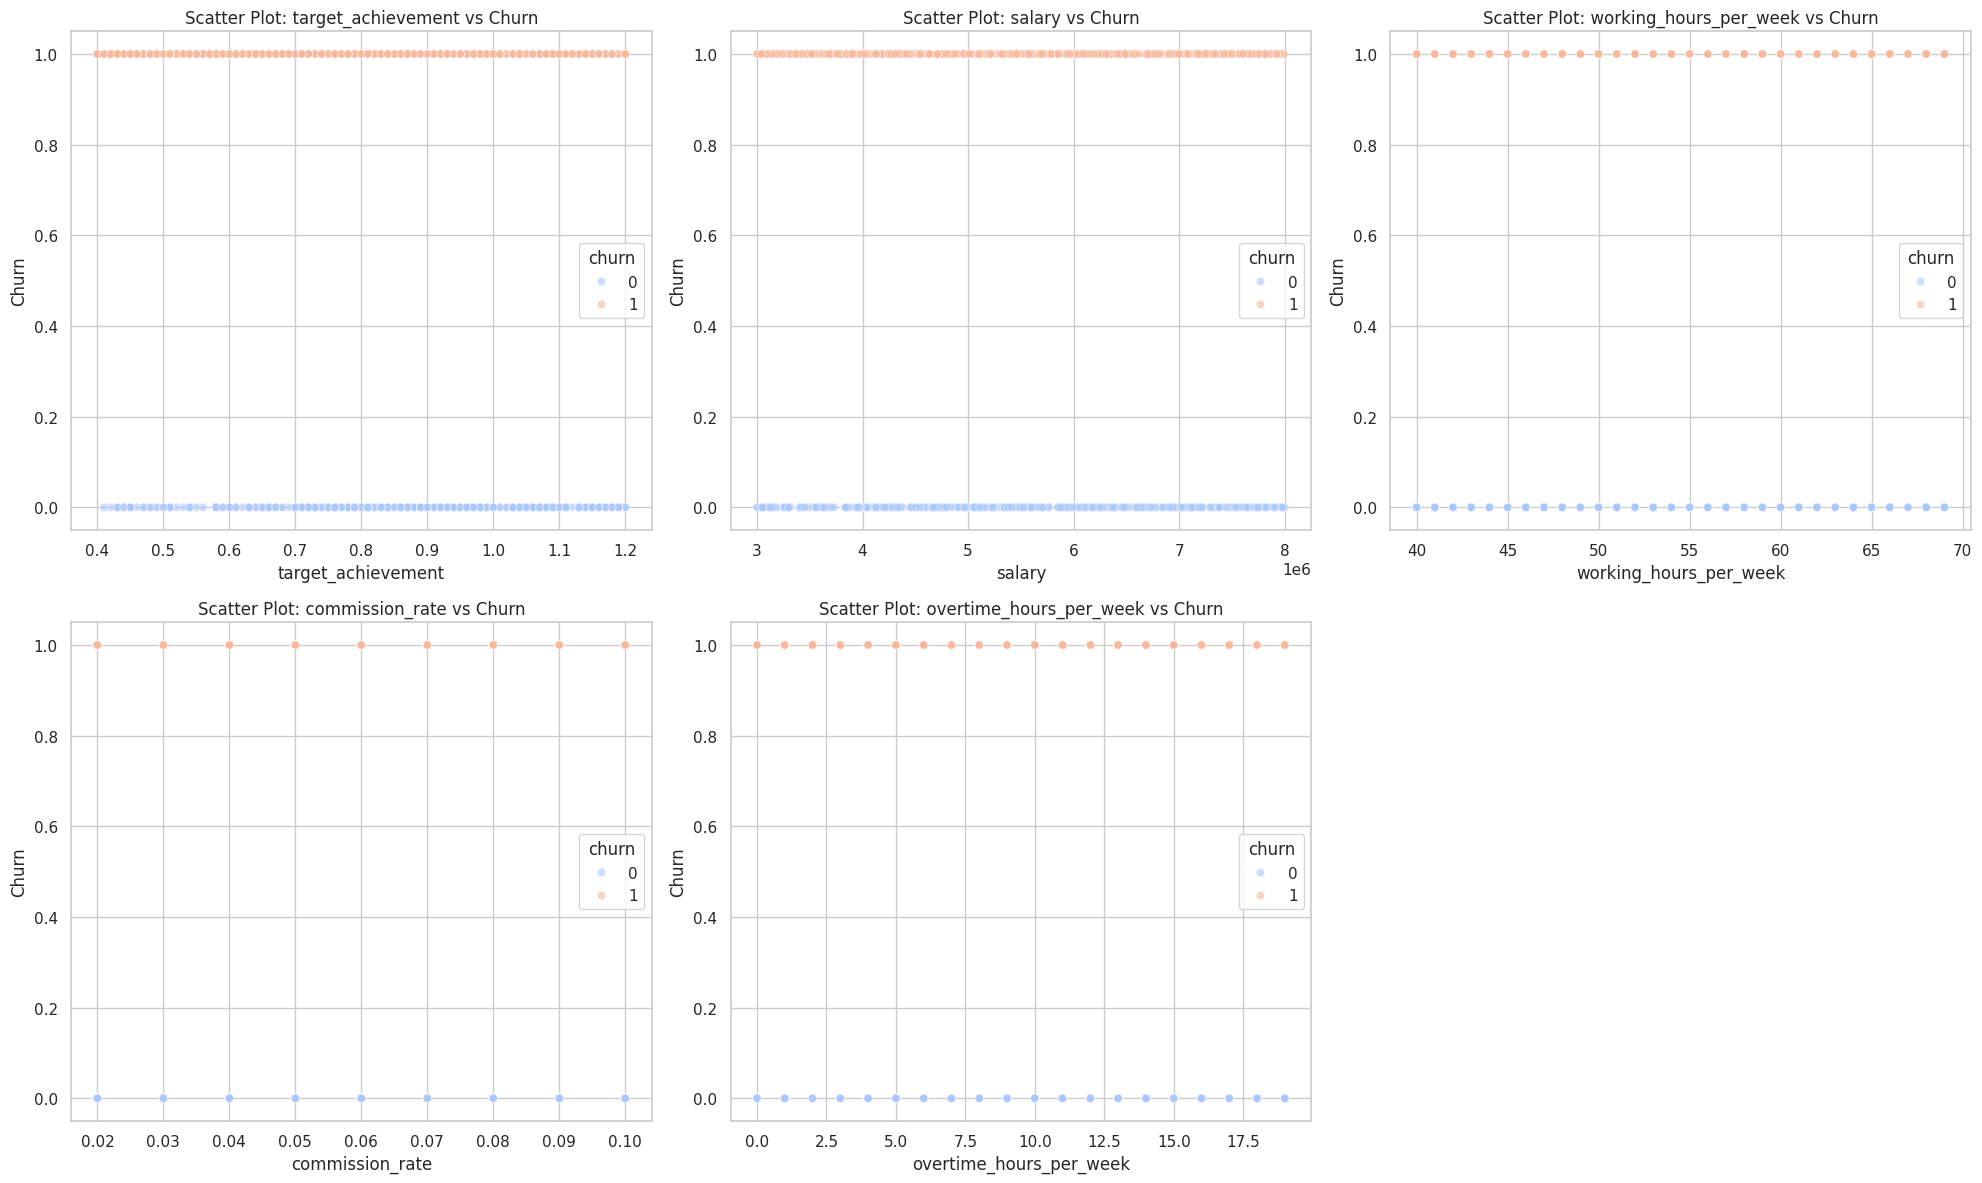

In [25]:
# Ambil 5 fitur teratas
top_features = ['target_achievement', 'salary', 'working_hours_per_week', 'commission_rate', 'overtime_hours_per_week']

# Buat scatter plot fitur vs churn
plt.figure(figsize=(20, 12))

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=data, x=feature, y='churn', hue='churn', palette='coolwarm', alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn')

plt.tight_layout()
plt.show()

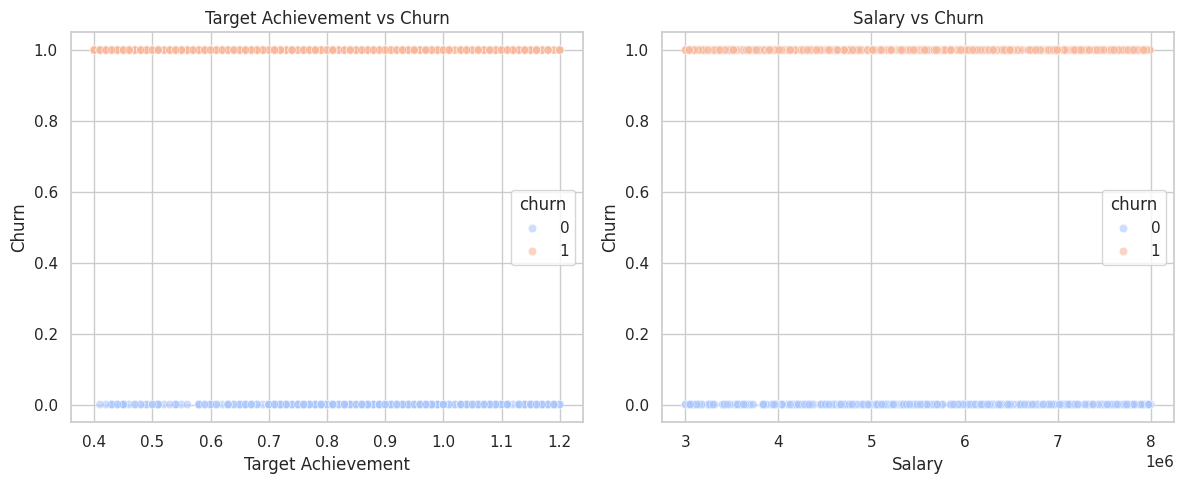

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot 1: target_achievement vs churn
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='target_achievement', y='churn', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Target Achievement vs Churn')
plt.xlabel('Target Achievement')
plt.ylabel('Churn')

# Plot 2: salary vs churn
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='salary', y='churn', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Salary vs Churn')
plt.xlabel('Salary')
plt.ylabel('Churn')

plt.tight_layout()
plt.show()

multivariate

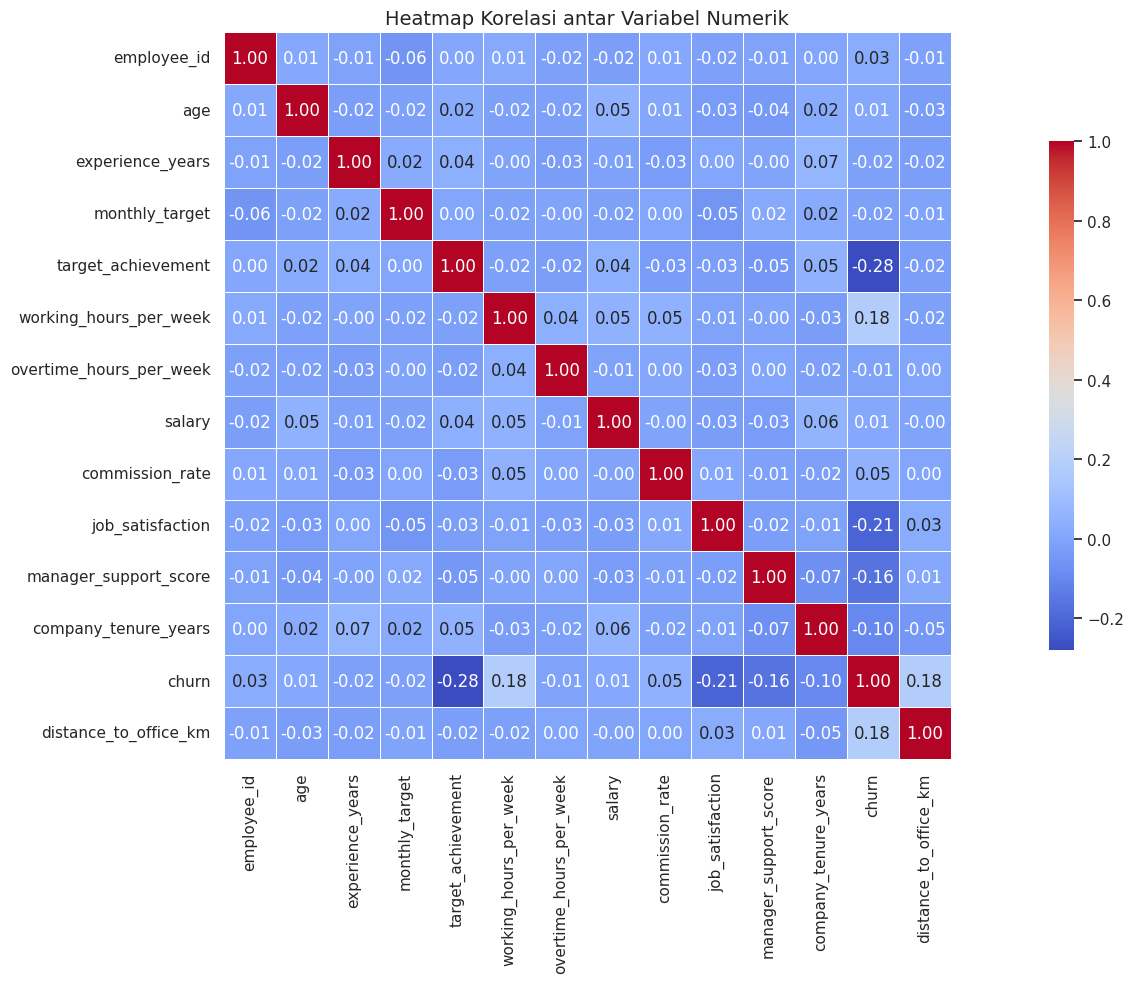

In [27]:
corr_matrix = data[nums].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.set(style="white")

sns.heatmap(
    corr_matrix,
    annot=True,          # tampilkan angka korelasi
    fmt=".2f",           # 2 desimal
    cmap='coolwarm',     # warna dari merah ke biru
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .7}
)

plt.title('Heatmap Korelasi antar Variabel Numerik', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Engineer


In [28]:
data['target_gap'] = data['monthly_target'] - data['target_achievement']                            # Estimasi jarak mencapai target
data['overwork_ratio'] = data['overtime_hours_per_week'] / data['working_hours_per_week'].replace(0, np.nan)  # Flagging burnout (value tinggi potensi relasi dengan capek yang relasi positif dengan churn)
data['tenure_per_age'] = data['company_tenure_years'] / (data['age'].replace(0, np.nan))                        # Indikasi loyalitas (makin tinggi makin loyal)
#data['income_per_hour'] = data['salary'] / ((data['working_hours_per_week'].replace(0, np.nan)) * 4.3)        # Representasi efisiensi gaji (gaji kecil bisa saja peluang jadi churn)
data['experience_to_tenure'] = data['experience_years'] / (data['company_tenure_years'] + 1)        # pengalaman yang dipunya VS lama kerja

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [30]:
data.sample()

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period,target_gap,overwork_ratio,tenure_per_age,experience_to_tenure
478,479,44,Male,Diploma,2,97,0.46,65,14,7176852,0.04,4,Urban,2,0.50,1,Married,38,Onboarding,96.54,0.22,0.01,1.33


### Transformation
Include:
- Scaling
- Encoding
- Imbalance Handling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

In [32]:
# Feature Encoding
df = data.copy()
df = df.drop(columns=['employee_id', 'churn_period']) # churn_period dibuang karena memberi informasi waktu yang diperlukan sebelum churning, hal ini dapat membuat model menjadi overfit terhadap sebuah preset data
df = df.dropna()

education_map = {'High School': 0, 'Diploma': 1, 'Bachelor': 2}     # Edukasi di mapping ulang
df['education'] = df['education'].map(education_map)

categorical_cols = ['gender', 'marital_status', 'work_location']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [33]:
df_encoded.sample(5)

,age,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,manager_support_score,company_tenure_years,churn,distance_to_office_km,target_gap,overwork_ratio,tenure_per_age,experience_to_tenure,gender_Male,marital_status_Single,work_location_Suburban,work_location_Urban
525,38,0,5,74,1.13,61,16,7372472,0.08,1,4,1.50,0,22,72.87,0.26,0.04,2.00,True,False,False,True
17,23,1,8,135,0.44,57,17,4382212,0.07,2,4,1.00,0,8,134.56,0.30,0.04,4.00,True,True,True,False
41,28,0,5,58,0.70,41,1,5696711,0.06,4,2,4.80,0,46,57.30,0.02,0.17,0.86,True,True,False,True
55,24,1,5,186,1.20,44,4,7289361,0.02,3,1,3.80,0,31,184.80,0.09,0.16,1.04,True,False,False,True
838,34,1,7,155,1.15,58,4,4040835,0.04,1,1,1.40,0,11,153.85,0.07,0.04,2.92,False,True,False,False


In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   education                1000 non-null   int64  
 2   experience_years         1000 non-null   int64  
 3   monthly_target           1000 non-null   int64  
 4   target_achievement       1000 non-null   float64
 5   working_hours_per_week   1000 non-null   int64  
 6   overtime_hours_per_week  1000 non-null   int64  
 7   salary                   1000 non-null   int64  
 8   commission_rate          1000 non-null   float64
 9   job_satisfaction         1000 non-null   int64  
 10  manager_support_score    1000 non-null   int64  
 11  company_tenure_years     1000 non-null   float64
 12  churn                    1000 non-null   int64  
 13  distance_to_office_km    1000 non-null   int64  
 14  target_gap               

In [35]:
# Scaling feature
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled

array([[-0.7072354 , -1.2927331 , -1.55574755, ..., -1.24018993,
         1.50953255, -1.        ],
       [ 1.19040345,  0.00259065,  0.52088989, ...,  0.80632811,
        -0.66245673,  1.        ],
       [ 0.46054235, -1.2927331 ,  1.21310237, ...,  0.80632811,
        -0.66245673,  1.        ],
       ...,
       [-0.12334653,  1.29791439,  0.86699613, ...,  0.80632811,
         1.50953255, -1.        ],
       [-0.41529096, -1.2927331 ,  0.86699613, ...,  0.80632811,
         1.50953255, -1.        ],
       [-1.4370965 ,  1.29791439,  0.52088989, ...,  0.80632811,
         1.50953255, -1.        ]])

### 5000 Samples - No Feature Selection

In [37]:
# Mengurus imbalance
## Oversample mayoritas (agar jadi 1000)
ros = RandomOverSampler(sampling_strategy={1: 2500}, random_state=42)
X_ros, y_ros = ros.fit_resample(X_scaled, y)

## SMOTE minoritas
smote = SMOTE(sampling_strategy={0: 2500}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_ros, y_ros)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"Original samples: {len(y)} | After SMOTE: {len(y_resampled)}")
print(f"Train set: {len(y_train)} | Test set: {len(y_test)}")

Original samples: 1000 | After SMOTE: 5000
Train set: 3500 | Test set: 1500


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [39]:
def train_eval_pipeline(X_train, X_test, y_train, y_test):
  models={
      "Logistic Regression": LogisticRegression(random_state=42),
      "Decision Tree": DecisionTreeClassifier(random_state=42),
      "Random Forest": RandomForestClassifier(random_state=42),
      "SVM": SVC(random_state=42),
      "KNN": KNeighborsClassifier()
  }

  for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['stay (0)', 'churn (1)']))
    print("====================================================")

In [40]:
train_eval_pipeline(X_train, X_test, y_train, y_test)


Model: Logistic Regression
              precision    recall  f1-score   support

    stay (0)       0.74      0.75      0.74       750
   churn (1)       0.74      0.73      0.74       750

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500


Model: Decision Tree
              precision    recall  f1-score   support

    stay (0)       0.96      0.91      0.93       750
   churn (1)       0.91      0.97      0.94       750

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500


Model: Random Forest
              precision    recall  f1-score   support

    stay (0)       0.99      0.97      0.98       750
   churn (1)       0.97      0.99      0.98       750

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
we

Random Forest
Random forest terbukti memiliki hasil evaluasi yang paling maksimal dibanding 4 model lainnya

In [59]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

'''
q40 = np.quantile(y_proba, 0.40)
q90 = np.quantile(y_proba, 0.90)


print(f"Threshold Low/Medium: {q40:.2f}")
print(f"Threshold Medium/High: {q90:.2f}")
'''

def batas_risk(prob):
    if prob < 0.33:
        return 'Low'
    elif prob < 0.66:
        return 'Medium'
    else:
        return 'High'

y_proba = model.predict_proba(X_test)[:, 1]

# Assign risk level
risk_levels = pd.Series(y_proba).apply(batas_risk)

# Combine with original predictions
results_df = pd.DataFrame({
    'churn_probability': y_proba,
    'predicted_class': model.predict(X_test),
    'risk_level': risk_levels
})

In [60]:
print("Ini hasil prediksi berdasarkan data yang ada, bukan data luar\n========================================================")
print(results_df.head(20))

Ini hasil prediksi berdasarkan data yang ada, bukan data luar
    churn_probability  predicted_class risk_level
0                0.09                0        Low
1                1.00                1       High
2                0.93                1       High
3                0.08                0        Low
4                0.97                1       High
5                0.00                0        Low
6                0.98                1       High
7                0.03                0        Low
8                0.05                0        Low
9                0.19                0        Low
10               0.01                0        Low
11               0.02                0        Low
12               0.84                1       High
13               1.00                1       High
14               0.11                0        Low
15               0.98                1       High
16               0.14                0        Low
17               0.08                0

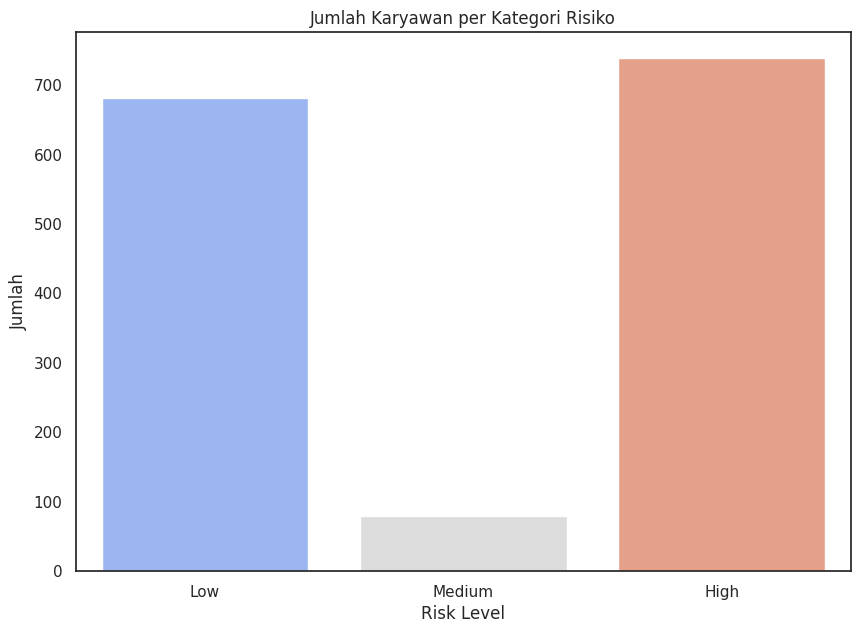

In [61]:
sns.countplot(x=results_df["risk_level"], order=["Low", "Medium", "High"], palette="coolwarm")
plt.title("Jumlah Karyawan per Kategori Risiko")
plt.ylabel("Jumlah")
plt.xlabel("Risk Level")
plt.show()

Best Threshold: 0.67, F1-score: 0.9886


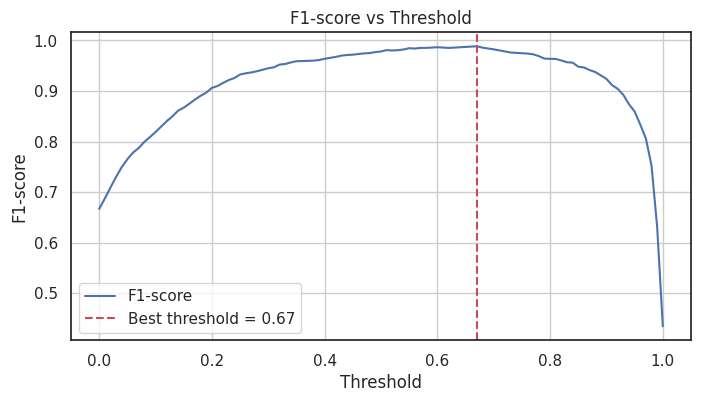

In [62]:
from sklearn.metrics import precision_recall_curve, f1_score
# Precision-recall-thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# F1-score per threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold: {best_thresh:.2f}, F1-score: {best_f1:.4f}")

# Plot F1 vs Threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores[:-1], label="F1-score")
plt.axvline(best_thresh, color='r', linestyle='--', label=f"Best threshold = {best_thresh:.2f}")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

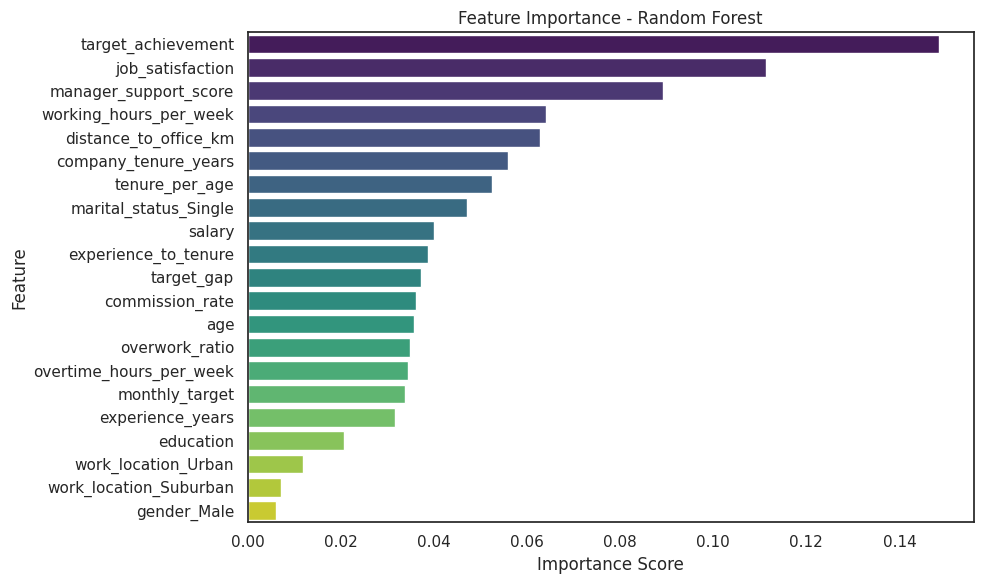

In [63]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Fit model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Ambil nama kolom dari X_encoded
feature_names = X_encoded.columns
importances = model.feature_importances_

# Buat DataFrame feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()